## 1. import libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [49]:
# This is so graphs are displayed.

%matplotlib inline

## 2. Import data and adjust for this exercise

In [50]:
# Import "NBA_players_csv" 

df = pd.read_csv(r'/Users/jlsanabria77/Desktop/FINAL PROJECT 6 NBA/Scripts/Data/Prepared Data/NBA_players.csv', engine="python")

In [51]:
df

,���,Name,Team,Age,player_height,player_weight,college,country_of_birth,draft_year,draft_round,...,points_per_game,rebounds,assists,player_diff,off_reb_pct,def_reb_pct,plays_used_pct,shots_pct,assists_pct,season
0,0,Dennis Rodman,CHI,36,198,100,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.190,0.32,0.10,0.48,0.11,1996-97
1,1,Dwayne Schintzius,LAC,28,216,118,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.080,0.15,0.18,0.43,0.05,1996-97
2,2,Earl Cureton,TOR,39,206,95,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.110,0.10,0.10,0.38,0.15,1996-97
3,3,Ed O'Bannon,DAL,24,203,101,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.15,0.17,0.40,0.08,1996-97
4,4,Ed Pinckney,MIA,34,206,109,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.110,0.18,0.13,0.61,0.04,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28,208,109,None,Germany,Undrafted,Undrafted,...,9.1,5.4,1.1,4.6,0.056,0.14,0.14,0.61,0.06,2019-20
11141,11141,Melvin Frazier Jr.,ORL,23,196,98,Tulane,USA,2018,2,...,1.2,0.3,0.1,-2.4,0.018,0.06,0.16,0.48,0.03,2019-20
11142,11142,Meyers Leonard,MIA,28,213,118,Illinois,USA,2012,1,...,6.1,5.1,1.1,5.6,0.029,0.22,0.12,0.64,0.08,2019-20
11143,11143,Norvel Pelle,PHI,27,208,105,None,USA,Undrafted,Undrafted,...,2.1,3.0,0.4,-16.4,0.085,0.24,0.13,0.52,0.06,2019-20


In [53]:
# Remove all non-numerical columns

df.drop(['Name','Team','college','draft_year','draft_round','position_drafted','country_of_birth','season'], axis=1,inplace=True)

In [54]:
df.head()

,���,Age,player_height,player_weight,games_played,points_per_game,rebounds,assists,player_diff,off_reb_pct,def_reb_pct,plays_used_pct,shots_pct,assists_pct
0,0,36,198,100,55,5.7,16.1,3.1,16.1,0.19,0.32,0.10,0.48,0.11
1,1,28,216,118,15,2.3,1.5,0.3,12.3,0.08,0.15,0.18,0.43,0.05
2,2,39,206,95,9,0.8,1.0,0.4,-2.1,0.11,0.10,0.10,0.38,0.15
3,3,24,203,101,64,3.7,2.3,0.6,-8.7,0.06,0.15,0.17,0.40,0.08
4,4,34,206,109,27,2.4,2.4,0.2,-11.2,0.11,0.18,0.13,0.61,0.04


### There is no need to standarized any variables as the scales aren't too large.

# 3. Using the elbow technique

In [55]:
num_cl = range(1, 10) # Defines the range of clusters.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range.

In [56]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

In [57]:
score

[-115373039566.28006,
 -28852574642.283108,
 -12830125325.553583,
 -7223079698.839459,
 -4627274366.081276,
 -3217695615.0641828,
 -2367895244.890539,
 -1815334331.3100145,
 -1436832895.3879552]

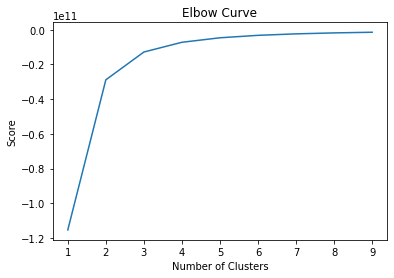

In [58]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##  4.As in the exercise there is a jump bewteen 2 and 3 and later evens out so I will take 3 as the number of clusters.

## 5. Run the k-means algorithm

In [59]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 


In [60]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/jlsanabria77/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

## 6. Attach new column for clusters

In [61]:
# Create a column with values corresponding to each cluster

df['clusters'] = kmeans.fit_predict(df)

/Users/jlsanabria77/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [62]:
df.head()

,���,Age,player_height,player_weight,games_played,points_per_game,rebounds,assists,player_diff,off_reb_pct,def_reb_pct,plays_used_pct,shots_pct,assists_pct,clusters
0,0,36,198,100,55,5.7,16.1,3.1,16.1,0.19,0.32,0.10,0.48,0.11,1
1,1,28,216,118,15,2.3,1.5,0.3,12.3,0.08,0.15,0.18,0.43,0.05,1
2,2,39,206,95,9,0.8,1.0,0.4,-2.1,0.11,0.10,0.10,0.38,0.15,1
3,3,24,203,101,64,3.7,2.3,0.6,-8.7,0.06,0.15,0.17,0.40,0.08,1
4,4,34,206,109,27,2.4,2.4,0.2,-11.2,0.11,0.18,0.13,0.61,0.04,1


In [66]:
# Check how many observations fall into each cluster
df['clusters'].value_counts()

2    3732
0    3715
1    3698
Name: clusters, dtype: int64

## 7.Create visualizations (scatterplots)

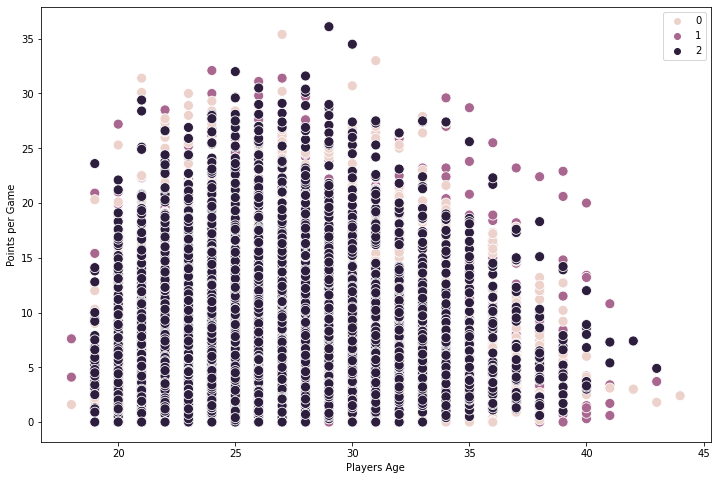

In [69]:
# Plot the clusters for the "Age" and "points_per_game" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Age'], y=df['points_per_game'], hue=kmeans.labels_, s=100) 

ax.grid(False) # Remove grid from background.
plt.xlabel('Players Age') # Label x-axis.
plt.ylabel('Points per Game') # Label y-axis.
plt.show()

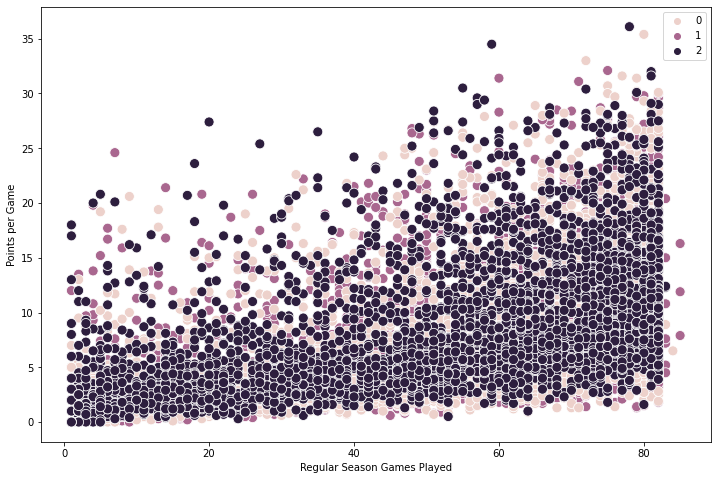

In [71]:
# Plot the clusters for the "Age" and "points_per_game" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['games_played'], y=df['points_per_game'], hue=kmeans.labels_, s=100) 

ax.grid(False) # Remove grid from background.
plt.xlabel('Regular Season Games Played') # Label x-axis.
plt.ylabel('Points per Game') # Label y-axis.
plt.show()

## 8. Do clusters make sense?

The first chart puts the clusters into lines as each line represents an age. It doesn't look as a "normal" cluster looks like. Altohugh unusual we can extract useful information from the first chart. The darkest dots represent the mayority of players and we can see the peak performance of these players as the most points scored are before they turn thirty, soon after the number of points scored slowly decline.

As for the second chart we can see a positive relationship between the number of games played and the points scored. Players who played more games (82 is the maximum) aslo socred more. This information can be important for my project as it relates productivity with good phisical condition. As players normally miss games due to injuries, being healthy over long periods of time helps them with their performance as they can get their rythim. Also this insight does not answer my initial hypothesis it is something I would like to explere further.

## 9. Conduct statistical analysis and discuss findings.

In [72]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [73]:
df.groupby('cluster').agg({'Age':['mean', 'median'], 
                         'games_played':['mean', 'median'], 
                         'points_per_game':['mean', 'median'],})

Age        games_played        points_per_game       
                  mean median         mean median            mean median
cluster                                                                 
dark purple  26.602358     26    50.138264     56        8.330466    6.9
pink         27.082369     26    53.764738     61        8.189475    6.7
purple       27.826933     27    52.123580     57        7.857355    6.3

From this statistics we can obtain very insteresting insights. First, The pink cluster, which represents the medium age group of player score the most points per game and also they play the most games. I want to use Age as a factor in my project because since medicine and nutrition continue to improve so does longevity of players. This brings a new idea to my initial hypothesis about foreing players influencing the game. Since other factors like age can also have an impact on how the game has evolved.